In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats

In [2]:
with open("Iba1_results.json") as file:
    results_iba1 = json.load(file)

#### calculate mean values for each DRG

In [3]:
control_results = {"iba_per_nna": [],
                  "neurons_per_npa": []}
patient_results = {"iba_per_nna": [],
                  "neurons_per_npa": []}
for result in results_iba1:
    if "control" in result["path"]:
        control_results["iba_per_nna"].append(np.mean(result["iba_per_nna"]))
        control_results["neurons_per_npa"].append(np.mean(result["neurons_per_npa"]))
    elif "patient" in result["path"]:
        patient_results["iba_per_nna"].append(np.mean(result["iba_per_nna"]))
        patient_results["neurons_per_npa"].append(np.mean(result["neurons_per_npa"]))

#### exclude data from control 4

In [5]:
control_results["iba_per_nna"].pop(3)

control_results["neurons_per_npa"].pop(3)

62.664218818142324

In [6]:
control_results 

{'iba_per_nna': [0.18878477912562017,
  0.09563101551494559,
  0.06976898006177958,
  0.07820980378663621,
  0.01687800954453044],
 'neurons_per_npa': [19.377071915267276,
  38.346751298065435,
  12.459446729527983,
  28.298411123381033,
  21.43935595937515]}

In [7]:
patient_results

{'iba_per_nna': [0.19648897666478893,
  0.16257208252209668,
  0.14873568040162002,
  0.10611461223311086,
  0.12365858026826848,
  0.11504614012400209],
 'neurons_per_npa': [25.131289475404643,
  27.445814412700567,
  29.607041782743277,
  44.94163076873615,
  31.04066608958733,
  39.465665011764116]}

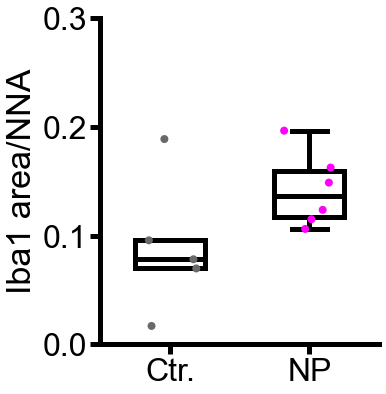

In [8]:
plt.figure(figsize=(5,6))
    
labels=['Ctr.', 'NP']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 0.3])
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(np.arange(0, 0.4, 0.1), fontname="Arial", fontsize=fontsize)


plt.ylabel('Iba1 area/NNA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results["iba_per_nna"], patient_results["iba_per_nna"]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results["iba_per_nna"] , patient_results["iba_per_nna"]], jitter=0.2, dodge=True, size=8, marker='o', palette=['dimgray', 'magenta'])

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

plt.savefig('Iba1_per_NNA.png', bbox_inches = "tight")
plt.show()

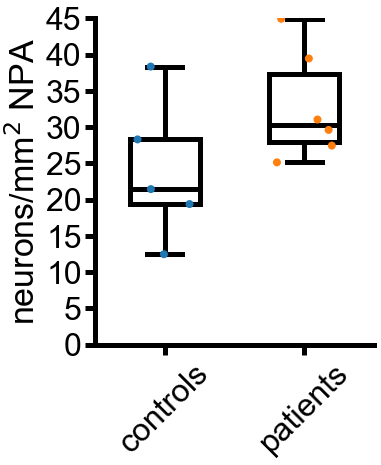

In [9]:
plt.figure(figsize=(5,6))
    
labels=['controls', 'patients']

c='k'
alpha=1
standard_props = {"color":c, "alpha":alpha, "linewidth":5}
markers= ['D','o']
line_props = standard_props
bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
median_props = standard_props
cap_props = standard_props
linewidth = 5
fontsize = 32
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.tick_params(length=10, width=linewidth)

ax.set_ylim([0, 45])
plt.xticks(fontname="Arial", fontsize=fontsize, rotation=45)
plt.yticks(fontname="Arial", fontsize=fontsize)


plt.ylabel('neurons/mm$^2$ NPA', fontname="Arial", fontsize=34)



sns.boxplot(data=[control_results["neurons_per_npa"] , patient_results["neurons_per_npa"]], width=0.5, whiskerprops=line_props, boxprops=bbox_props
            ,capprops=cap_props, medianprops=median_props, fliersize=0)
sns.stripplot(data=[control_results["neurons_per_npa"] , patient_results["neurons_per_npa"]], jitter=0.2, dodge=True, size=8, marker='o', palette='tab10')

ax.set_xticklabels(labels, fontname="Arial", fontsize=32)

#plt.savefig('neurons_per_nra.png', bbox_inches = "tight")
plt.show()